In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.stats import binom, beta
import random

if join a table, update phi

if set up a new table, a new phi'

normalize phi and phi'

random select from array phi and single value phi'

if phi' , add

then generate theta 

In [2]:
def read_data():
    #hard code for convenience in this assignment
    X = np.genfromtxt('X.csv', delimiter = ',')
    N = X.shape[0]
    return X, N

In [3]:
def calc_theta(X, d):
    a0 = b0 = 0.5
    kt = len(d.keys())
    theta = np.ones(kt)
    a = np.ones(kt)
    b = np.ones(kt)
    for i in range(kt):
        a[i] = np.sum(X[d['cluster_%d' %i ]['contains']]) + a0
        b[i] = np.sum(20-X[d['cluster_%d' %i ]['contains']]) +b0
    theta = beta.rvs(a, b)
    return theta

In [4]:
def initialize_cluster(X, N = 2000, num_cluster = 30):
    # use a dictionary to record clusters
    d ={}
    for i in range(num_cluster):
        d['cluster_%d' %i ]= {}
    for i in range(num_cluster):
        d['cluster_%d' %i ]['contains'] = []
    rand_assign = np.random.choice(num_cluster, N, p=[1/num_cluster for i in range(30)])
    for index, i in enumerate(rand_assign):
        d['cluster_%d' %i ]['contains'].append(index)
    
    theta = calc_theta(X, d)
    
    return d, theta

In [5]:
def gen_phi_full(X, theta, d, alpha):
    n = []
    kt = len(d.keys())
    for i in range(kt):
        n.append([len(d['cluster_%d' %i]['contains'])])
        
    phi=[0 for i in range(N) for i in range(kt)]
    phi_prime=[0 for i in range(N)]
    for i in range(N):
        phi[i] = binom.pmf(k = X[i], n = 20, p = theta)*n/(alpha+N-1)
        phi_prime[i] = alpha/(alpha+N-1)/kt*np.sum(binom.pmf(k = X[i], n = 20, p = theta))
        
    return phi,phi_prime

def gen_phi(X, theta, d, alpha, i, kt, N):
    n = call_n(kt, d)
    
    phi = binom.pmf(k = X[i], n = 20, p = theta)*(n.T)/(alpha+N-1)
    phi = phi.flatten()
    phi_prime = 0
    phi_prime = alpha/(alpha+N-1)/kt*np.sum(binom.pmf(k = X[i], n = 20, p = theta))
    phi = np.append(phi,phi_prime)
    
    total = np.sum(phi)
    phi = phi/total
    
    return phi

In [6]:
def check_reindex(d):
    kt = len(d.keys())
    i = 0
    while i < kt:
        if d['cluster_%d' %i ]['contains'] == []:
            d['cluster_%d' %i ]['contains'] = d['cluster_%d' %(kt-1)]['contains']
            del d['cluster_%d' %(kt-1)]
            kt = kt-1
        i +=1
    return d, kt

In [7]:
def call_n(kt, d):
    n = []
    for i in range(kt):
        n.append([len(d['cluster_%d' %i]['contains'])])
    n = np.array(n)
    
    return n

In [8]:
def add_cluster(d, index_add, kt):
    d['cluster_%d' %kt] = {}
    d['cluster_%d' %kt]['contains'] = [index_add]
    return d

In [9]:
def remove_from_cluster(d, index_remove, kt):
    for i in range(kt):
        if index_remove in d['cluster_%d' %i ]['contains']:
            d['cluster_%d' %i ]['contains'].remove(index_remove)
    return d

In [10]:
def gibbs(T=1000):
    # initialization
    X,N = read_data()
    alpha = 3/4
    d, theta = initialize_cluster(X)
    
    # to draw graph
    plot = {}
    for i in range(6):
        plot['mostprobable_rank_%d' %(i+1)]= []
    
    num_of_clusters = []
    
    for iter in range(T):
        print("--------------iteration %d-------------------" %iter)
        print("Current number of cluster is "+ str(len(d.keys())))
        num_of_clusters.append(len(d.keys()))
#         print(num_of_clusters)
        
        n = call_n(len(d.keys()), d)
        n = n.tolist()
        n = np.sort(n, axis = None)
#         print("====n=====")
#         print(n)
        if len(n) > 6:
            for i in range(6):
                plot['mostprobable_rank_%d' %(i+1)].append((n[-(i+1)]))
        else:
            for i in range(len(n)):
                plot['mostprobable_rank_%d' %(i+1)].append(n[-(i+1)])
            for i in range(len(n),6):
                plot['mostprobable_rank_%d' %(i+1)].append(0)
#         print(plot)
                
        for i in range(N):
            d, kt = check_reindex(d)
            d = remove_from_cluster(d, i, kt)
            theta = calc_theta(X, d)
            phi = gen_phi(X, theta, d, alpha, i, kt, N)
            c = np.random.choice(len(phi), p = list(phi))
            if c == (len(phi)-1):
                d = add_cluster(d, i, kt)
            else:
                #which_cluster = np.where(phi==c)[0]
                d['cluster_%d' %c ]['contains'].append(i)
    
    return d, num_of_clusters, plot

In [11]:
result_d, num_clusters, most_prob_plot = gibbs()

--------------iteration 0-------------------
Current number of cluster is 30
--------------iteration 1-------------------
Current number of cluster is 31
--------------iteration 2-------------------
Current number of cluster is 31
--------------iteration 3-------------------
Current number of cluster is 30
--------------iteration 4-------------------
Current number of cluster is 32
--------------iteration 5-------------------
Current number of cluster is 31
--------------iteration 6-------------------
Current number of cluster is 32
--------------iteration 7-------------------
Current number of cluster is 32
--------------iteration 8-------------------
Current number of cluster is 33
--------------iteration 9-------------------
Current number of cluster is 30
--------------iteration 10-------------------
Current number of cluster is 32
--------------iteration 11-------------------
Current number of cluster is 32
--------------iteration 12-------------------
Current number of cluster is

--------------iteration 106-------------------
Current number of cluster is 7
--------------iteration 107-------------------
Current number of cluster is 7
--------------iteration 108-------------------
Current number of cluster is 9
--------------iteration 109-------------------
Current number of cluster is 13
--------------iteration 110-------------------
Current number of cluster is 14
--------------iteration 111-------------------
Current number of cluster is 13
--------------iteration 112-------------------
Current number of cluster is 12
--------------iteration 113-------------------
Current number of cluster is 10
--------------iteration 114-------------------
Current number of cluster is 11
--------------iteration 115-------------------
Current number of cluster is 12
--------------iteration 116-------------------
Current number of cluster is 11
--------------iteration 117-------------------
Current number of cluster is 12
--------------iteration 118-------------------
Current 

--------------iteration 211-------------------
Current number of cluster is 8
--------------iteration 212-------------------
Current number of cluster is 8
--------------iteration 213-------------------
Current number of cluster is 11
--------------iteration 214-------------------
Current number of cluster is 10
--------------iteration 215-------------------
Current number of cluster is 11
--------------iteration 216-------------------
Current number of cluster is 10
--------------iteration 217-------------------
Current number of cluster is 9
--------------iteration 218-------------------
Current number of cluster is 8
--------------iteration 219-------------------
Current number of cluster is 8
--------------iteration 220-------------------
Current number of cluster is 8
--------------iteration 221-------------------
Current number of cluster is 8
--------------iteration 222-------------------
Current number of cluster is 8
--------------iteration 223-------------------
Current numbe

--------------iteration 316-------------------
Current number of cluster is 6
--------------iteration 317-------------------
Current number of cluster is 6
--------------iteration 318-------------------
Current number of cluster is 5
--------------iteration 319-------------------
Current number of cluster is 7
--------------iteration 320-------------------
Current number of cluster is 7
--------------iteration 321-------------------
Current number of cluster is 7
--------------iteration 322-------------------
Current number of cluster is 5
--------------iteration 323-------------------
Current number of cluster is 7
--------------iteration 324-------------------
Current number of cluster is 8
--------------iteration 325-------------------
Current number of cluster is 8
--------------iteration 326-------------------
Current number of cluster is 8
--------------iteration 327-------------------
Current number of cluster is 7
--------------iteration 328-------------------
Current number of

--------------iteration 421-------------------
Current number of cluster is 8
--------------iteration 422-------------------
Current number of cluster is 6
--------------iteration 423-------------------
Current number of cluster is 5
--------------iteration 424-------------------
Current number of cluster is 5
--------------iteration 425-------------------
Current number of cluster is 5
--------------iteration 426-------------------
Current number of cluster is 5
--------------iteration 427-------------------
Current number of cluster is 4
--------------iteration 428-------------------
Current number of cluster is 3
--------------iteration 429-------------------
Current number of cluster is 3
--------------iteration 430-------------------
Current number of cluster is 5
--------------iteration 431-------------------
Current number of cluster is 3
--------------iteration 432-------------------
Current number of cluster is 3
--------------iteration 433-------------------
Current number of

--------------iteration 527-------------------
Current number of cluster is 7
--------------iteration 528-------------------
Current number of cluster is 6
--------------iteration 529-------------------
Current number of cluster is 5
--------------iteration 530-------------------
Current number of cluster is 6
--------------iteration 531-------------------
Current number of cluster is 7
--------------iteration 532-------------------
Current number of cluster is 5
--------------iteration 533-------------------
Current number of cluster is 6
--------------iteration 534-------------------
Current number of cluster is 6
--------------iteration 535-------------------
Current number of cluster is 6
--------------iteration 536-------------------
Current number of cluster is 7
--------------iteration 537-------------------
Current number of cluster is 7
--------------iteration 538-------------------
Current number of cluster is 7
--------------iteration 539-------------------
Current number of

--------------iteration 632-------------------
Current number of cluster is 8
--------------iteration 633-------------------
Current number of cluster is 7
--------------iteration 634-------------------
Current number of cluster is 9
--------------iteration 635-------------------
Current number of cluster is 9
--------------iteration 636-------------------
Current number of cluster is 9
--------------iteration 637-------------------
Current number of cluster is 11
--------------iteration 638-------------------
Current number of cluster is 10
--------------iteration 639-------------------
Current number of cluster is 9
--------------iteration 640-------------------
Current number of cluster is 8
--------------iteration 641-------------------
Current number of cluster is 9
--------------iteration 642-------------------
Current number of cluster is 9
--------------iteration 643-------------------
Current number of cluster is 7
--------------iteration 644-------------------
Current number 

--------------iteration 737-------------------
Current number of cluster is 7
--------------iteration 738-------------------
Current number of cluster is 7
--------------iteration 739-------------------
Current number of cluster is 7
--------------iteration 740-------------------
Current number of cluster is 7
--------------iteration 741-------------------
Current number of cluster is 7
--------------iteration 742-------------------
Current number of cluster is 7
--------------iteration 743-------------------
Current number of cluster is 7
--------------iteration 744-------------------
Current number of cluster is 7
--------------iteration 745-------------------
Current number of cluster is 7
--------------iteration 746-------------------
Current number of cluster is 7
--------------iteration 747-------------------
Current number of cluster is 8
--------------iteration 748-------------------
Current number of cluster is 7
--------------iteration 749-------------------
Current number of

--------------iteration 843-------------------
Current number of cluster is 6
--------------iteration 844-------------------
Current number of cluster is 7
--------------iteration 845-------------------
Current number of cluster is 6
--------------iteration 846-------------------
Current number of cluster is 6
--------------iteration 847-------------------
Current number of cluster is 6
--------------iteration 848-------------------
Current number of cluster is 6
--------------iteration 849-------------------
Current number of cluster is 6
--------------iteration 850-------------------
Current number of cluster is 6
--------------iteration 851-------------------
Current number of cluster is 7
--------------iteration 852-------------------
Current number of cluster is 6
--------------iteration 853-------------------
Current number of cluster is 5
--------------iteration 854-------------------
Current number of cluster is 7
--------------iteration 855-------------------
Current number of

--------------iteration 948-------------------
Current number of cluster is 7
--------------iteration 949-------------------
Current number of cluster is 7
--------------iteration 950-------------------
Current number of cluster is 8
--------------iteration 951-------------------
Current number of cluster is 7
--------------iteration 952-------------------
Current number of cluster is 8
--------------iteration 953-------------------
Current number of cluster is 7
--------------iteration 954-------------------
Current number of cluster is 7
--------------iteration 955-------------------
Current number of cluster is 8
--------------iteration 956-------------------
Current number of cluster is 9
--------------iteration 957-------------------
Current number of cluster is 7
--------------iteration 958-------------------
Current number of cluster is 7
--------------iteration 959-------------------
Current number of cluster is 7
--------------iteration 960-------------------
Current number of

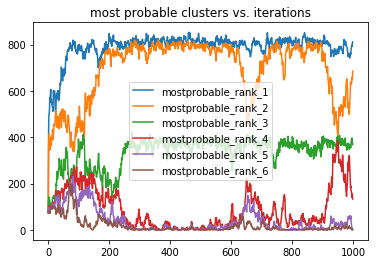

In [12]:
for i in range(6):
    plt.plot(most_prob_plot['mostprobable_rank_%d' %(i+1)], label = 'mostprobable_rank_%d' %(i+1))
plt.legend(loc='best')
plt.title("most probable clusters vs. iterations")
plt.show()

Text(0.5,1,'number of clusters vs. iterations')

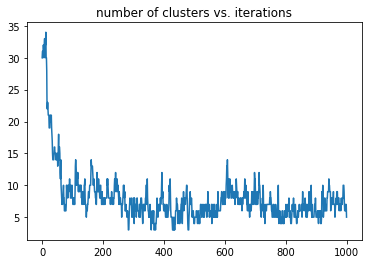

In [13]:
plt.plot(num_clusters)
plt.title("number of clusters vs. iterations")